# pyivp.XYPatternBlock

> API details.

## Run python library in Jupyter Notebook

In [2]:
import pyivp

### XYPoint
create a XYPoint object v1

In [3]:
v1 = pyivp.XYPoint(35, 30)

### XYPattenBlock
create a XYPatternBlock object py_block, and add ID point v1

In [4]:
py_block = pyivp.XYPatternBlock()
py_block.add_idpoint(v1)

you can set 5 parameters :  
1. block width 
2. block length 
3. swath width
4. angle 
5. id point

In [5]:
py_block.set_param("block_width", 50)

True

In [6]:
points = py_block.get_lane_points()
for point in points:
    print(point.get_spec(""))

In [7]:
seglist = py_block.get_lane_segments()
for seg in seglist:
    print(seg.get_spec(""))

### 2 distance functions

In [8]:
print(py_block.distance_to_closestentry.__doc__)

distance_to_closestentry(self: pyivp.XYPatternBlock, osx: float, osy: float, any_segment: bool) -> float

By default, any_segment is set to true and the shortest distance is calculated by considering the endpoints of ANY of the lane segments. If any_segment is false, only the first,last (or outer) lane segments are considered.

Inputs : 
osx : x coordinate of the target.
osy : y coordinate of the target.

Returns : 
-1 (if there are any problems) or Distance to the shortest entry point.



In [9]:
print(py_block.distance_to_crossaxis.__doc__)

distance_to_crossaxis(self: pyivp.XYPatternBlock, osx: float, osy: float) -> float

This function will calculate the distance between target and cross axis.

Inputs : 
osx : x coordinate of the target.
osy : y coordinate of the target.

Returns : 
-1 (if there are any problems) or Distance to the cross axis.



In [10]:
dist_entry = py_block.distance_to_closestentry(osx = 30, osy = -50, any_segment = True)
dist_crossAxis = py_block.distance_to_crossaxis(osx = 30, osy = 50)
print(f'distance to entry : {dist_entry} \ndistance to cross axis : {dist_crossAxis}')

distance to entry : 44.72135954999579 
distance to cross axis : 20.0


In [11]:
py_block.build_composite_seglist(30,30)

s1 is a XYSegList object

In [12]:
s1 = py_block.get_composite_seglist()
s1.get_spec("")

'pts={10,-10:10,70:20,70:20,-10:30,-10:30,70:40,70:40,-10:50,-10:50,70:60,70:60,-10},tags={0:1:lane#2:3:lane#4:5:lane#6:7:lane#8:9:lane#10:11:lane}'

## MovingPandas

In [13]:
import pyivp
import pandas as pd
from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

import sys
sys.path.append("../")
import movingpandas as mpd
mpd.show_versions()

# import warnings
# warnings.simplefilter("ignore")


MovingPandas 0.16.0

SYSTEM INFO
-----------
python     : 3.8.10 (default, Jun 22 2022, 20:18:18)  [GCC 9.4.0]
executable : /usr/bin/python3
machine    : Linux-5.15.0-69-generic-x86_64-with-glibc2.29

GEOS, GDAL, PROJ INFO
---------------------
GEOS       : None
GEOS lib   : None
GDAL       : 3.5.3
GDAL data dir: /usr/local/lib/python3.8/dist-packages/fiona/gdal_data
PROJ       : 9.2.0
PROJ data dir: /usr/local/lib/python3.8/dist-packages/pyproj/proj_dir/share/proj

PYTHON DEPENDENCIES
-------------------
geopandas  : 0.13.0
pandas     : 1.5.3
fiona      : 1.9.3
numpy      : 1.24.1
shapely    : 2.0.1
rtree      : 1.0.1
pyproj     : 3.5.0
matplotlib : 3.6.3
mapclassify: None
geopy      : 2.3.0
holoviews  : 1.16.0
hvplot     : 0.8.3
geoviews   : 1.9.6
stonesoup  : None


In [14]:
block = pyivp.XYPatternBlock()

In [15]:
mid_point = pyivp.XYPoint(50,50)

In [16]:
block.add_idpoint(mid_point)

In [17]:
block.build_composite_seglist(30,30)
point_seglist = block.get_composite_seglist()

In [18]:
# get points' information from XYSeglist
point_list = point_seglist.get_spec_pts()
start = point_list.find('{')
end = point_list.find('}')
point_list = point_list[start+1:end].split(":")
for i, v in enumerate(point_list):
    x, y = v.split(',')
    point_list[i] = [int(x),int(y)]

In [19]:
df = pd.DataFrame([
  {'geometry':Point(point_list[0][0],point_list[0][1]), 't':datetime(2018,1,1,12,0,0)},
  {'geometry':Point(point_list[1][0],point_list[1][1]), 't':datetime(2018,1,1,12,6,0)},
  {'geometry':Point(point_list[2][0],point_list[2][1]), 't':datetime(2018,1,1,12,10,0)},
  {'geometry':Point(point_list[3][0],point_list[3][1]), 't':datetime(2018,1,1,12,15,0)},
  {'geometry':Point(point_list[4][0],point_list[4][1]), 't':datetime(2018,1,1,12,20,0)},
  {'geometry':Point(point_list[5][0],point_list[5][1]), 't':datetime(2018,1,1,12,25,0)}, 
  {'geometry':Point(point_list[6][0],point_list[6][1]), 't':datetime(2018,1,1,12,30,0)},
  {'geometry':Point(point_list[7][0],point_list[7][1]), 't':datetime(2018,1,1,12,35,0)},
  {'geometry':Point(point_list[8][0],point_list[8][1]), 't':datetime(2018,1,1,12,40,0)},
  {'geometry':Point(point_list[9][0],point_list[9][1]), 't':datetime(2018,1,1,12,45,0)},
]).set_index('t')
geo_df = GeoDataFrame(df, crs=31256)
toy_traj = mpd.Trajectory(geo_df, 1)
toy_traj.df


,geometry
t,
2018-01-01 12:00:00,POINT (30.000 10.000)
2018-01-01 12:06:00,POINT (30.000 90.000)
2018-01-01 12:10:00,POINT (40.000 90.000)
2018-01-01 12:15:00,POINT (40.000 10.000)
2018-01-01 12:20:00,POINT (50.000 10.000)
2018-01-01 12:25:00,POINT (50.000 90.000)
2018-01-01 12:30:00,POINT (60.000 90.000)
2018-01-01 12:35:00,POINT (60.000 10.000)
2018-01-01 12:40:00,POINT (70.000 10.000)


In [20]:
toy_traj.to_line_gdf()

,t,prev_t,geometry
0,2018-01-01 12:06:00,2018-01-01 12:00:00,"LINESTRING (30.00000 10.00000, 30.00000 90.00000)"
1,2018-01-01 12:10:00,2018-01-01 12:06:00,"LINESTRING (30.00000 90.00000, 40.00000 90.00000)"
2,2018-01-01 12:15:00,2018-01-01 12:10:00,"LINESTRING (40.00000 90.00000, 40.00000 10.00000)"
3,2018-01-01 12:20:00,2018-01-01 12:15:00,"LINESTRING (40.00000 10.00000, 50.00000 10.00000)"
4,2018-01-01 12:25:00,2018-01-01 12:20:00,"LINESTRING (50.00000 10.00000, 50.00000 90.00000)"
5,2018-01-01 12:30:00,2018-01-01 12:25:00,"LINESTRING (50.00000 90.00000, 60.00000 90.00000)"
6,2018-01-01 12:35:00,2018-01-01 12:30:00,"LINESTRING (60.00000 90.00000, 60.00000 10.00000)"
7,2018-01-01 12:40:00,2018-01-01 12:35:00,"LINESTRING (60.00000 10.00000, 70.00000 10.00000)"
8,2018-01-01 12:45:00,2018-01-01 12:40:00,"LINESTRING (70.00000 10.00000, 70.00000 90.00000)"


In [21]:
toy_traj.to_traj_gdf(wkt=True)

,traj_id,start_t,end_t,geometry,length,direction,wkt
0,1,2018-01-01 12:00:00,2018-01-01 12:45:00,"LINESTRING (30.000 10.000, 30.000 90.000, 40.0...",440.0,26.565051,"LINESTRING M (30.0 10.0 1514808000.0, 30.0 90...."


In [22]:
toy_traj.add_speed(overwrite=True)

<AxesSubplot: >

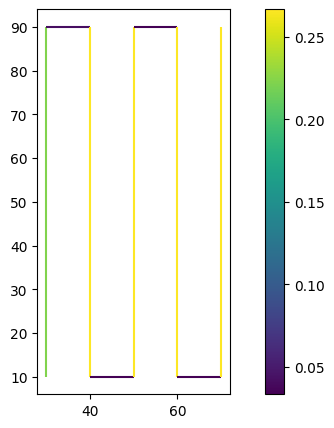

In [25]:
toy_traj.plot(column='speed', legend=True, figsize=(9,5))